# EDA

## Data preparation

In [41]:
import pandas as pd
import os

df = pd.read_csv(os.path.join('..', 'jobData.csv'), on_bad_lines='skip')
df.head()

,Position,Company,Experience,Salary,Used Technologies,Optional Technologies
0,Embedded Software Engineer,Fluke Corportaion,mid,13000 18000,"{'C': 'regular', 'C++': 'regular', 'Linux': 'r...",-
1,Azure Platform Engineer (AI Department),Procter & Gamble,mid,-,"{'Microsoft Azure': 'advanced', 'Python': 'adv...",-
2,.NET Developer,UN7,mid,20000 28000,{'.Net': 'advanced'},-
3,Spec. Projektant Robotyzacji Procesów,Credit Agricole Bank Polska S.A.,mid,-,"{'C#': 'regular', 'VB.Net': 'regular', 'Java':...",-
4,HT Functional Consultant with ERP Industry Sol...,Accenture,mid,-,"{'English': 'master', 'ERP': 'advanced', 'Prob...",-


In [42]:
mask = df['Salary'].str.match('^\S+\s+\S+$')
df = df[mask]

split_salaries = df['Salary'].str.split(' ', expand=True)
df['Salary_Min'] = split_salaries[0]
df['Salary_Max'] = split_salaries[1]
df['Salary_Min'] = pd.to_numeric(df['Salary_Min'], errors='coerce')
df['Salary_Max'] = pd.to_numeric(df['Salary_Max'], errors='coerce')

df = df.dropna(subset=['Salary_Min', 'Salary_Max'])
df.head()

,Position,Company,Experience,Salary,Used Technologies,Optional Technologies,Salary_Min,Salary_Max
0,Embedded Software Engineer,Fluke Corportaion,mid,13000 18000,"{'C': 'regular', 'C++': 'regular', 'Linux': 'r...",-,13000,18000.0
2,.NET Developer,UN7,mid,20000 28000,{'.Net': 'advanced'},-,20000,28000.0
10,Data Transformation Consultant,Accenture,mid,13000 25000,"{'SQL': 'advanced', 'Python': 'advanced', 'PyS...",-,13000,25000.0
13,Senior DevOps Engineer (Azure),GetInData | Part of Xebia,senior,25200 31080,"{'Azure': 'advanced', 'Kubernetes': 'advanced'...",-,25200,31080.0
26,DevOps Engineer #Kubernetes (m/f/x),Cpl Poland,mid,15000 24000,"{'Linux': 'advanced', 'Kubernetes': 'regular',...",-,15000,24000.0


In [43]:
import ast

def extract_technologies(tech_str):
    """ Extract technologies from a string. Assumes dictionary strings or comma-separated strings. """
    try:
        # Attempt to parse the string as a dictionary and extract keys (technologies)
        tech_dict = ast.literal_eval(tech_str)
        if isinstance(tech_dict, dict):
            return list(tech_dict.keys())
    except Exception:
        pass

    # For non-dictionary strings, assume a comma-separated list of technologies
    if isinstance(tech_str, str):
        return [tech.strip() for tech in tech_str.split(',') if tech.strip()]

    # Return an empty list for non-parsable or non-string entries
    return []

def normalize_seniority():

    senior_titles = ["senior", "expert"]
    manager_titles = ['manager / supervisor', 'manager / supervisor, team manager', 'kierownik / koordynator']
    df['Experience'] = df['Experience']\
    .str.lower()\
    .replace(manager_titles, 'manager')\
    .replace(senior_titles, 'senior')

    return df


# Apply the function to each entry in the 'Used Technologies' column
df['Parsed Used Technologies'] = df['Used Technologies'].apply(extract_technologies)
normalize_seniority()

# Display the first few rows of extracted technologies for verification
df.head()

,Position,Company,Experience,Salary,Used Technologies,Optional Technologies,Salary_Min,Salary_Max,Parsed Used Technologies
0,Embedded Software Engineer,Fluke Corportaion,mid,13000 18000,"{'C': 'regular', 'C++': 'regular', 'Linux': 'r...",-,13000,18000.0,"[C, C++, Linux, SVN, Yocto, Qt]"
2,.NET Developer,UN7,mid,20000 28000,{'.Net': 'advanced'},-,20000,28000.0,[.Net]
10,Data Transformation Consultant,Accenture,mid,13000 25000,"{'SQL': 'advanced', 'Python': 'advanced', 'PyS...",-,13000,25000.0,"[SQL, Python, PySpark, Apache Spark, Databrick..."
13,Senior DevOps Engineer (Azure),GetInData | Part of Xebia,senior,25200 31080,"{'Azure': 'advanced', 'Kubernetes': 'advanced'...",-,25200,31080.0,"[Azure, Kubernetes, Python, Terraform, Gitlab ..."
26,DevOps Engineer #Kubernetes (m/f/x),Cpl Poland,mid,15000 24000,"{'Linux': 'advanced', 'Kubernetes': 'regular',...",-,15000,24000.0,"[Linux, Kubernetes, Ansible, GitLab, Python/Ba..."


In [44]:
df.to_csv('jobData_prepared.csv')

## Analyses

1. Basic Information about the DataFrame
This code provides an overview of the dataframe, including the number of rows, columns, and types of data in each column.

In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 295 entries, 0 to 852
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Position                  295 non-null    object 
 1   Company                   295 non-null    object 
 2   Experience                260 non-null    object 
 3   Salary                    295 non-null    object 
 4   Used Technologies         231 non-null    object 
 5   Optional Technologies     140 non-null    object 
 6   Salary_Min                295 non-null    int64  
 7   Salary_Max                295 non-null    float64
 8   Parsed Used Technologies  295 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 23.0+ KB
None


2. Descriptive Statistics
This code block will give you a statistical summary of all numerical columns, including count, mean, standard deviation, min, and max values.

In [46]:
print(df.describe())

         Salary_Min    Salary_Max
count    295.000000    295.000000
mean   15619.755932  22220.488136
std     6044.236217   7212.951330
min     4000.000000   4800.000000
25%    10500.000000  17460.000000
50%    15000.000000  22000.000000
75%    20000.000000  27000.000000
max    33600.000000  42000.000000


3. Checking for Missing Values
This code helps in identifying any missing values in each column.

In [47]:
print(df.isnull().sum())

Position                      0
Company                       0
Experience                   35
Salary                        0
Used Technologies            64
Optional Technologies       155
Salary_Min                    0
Salary_Max                    0
Parsed Used Technologies      0
dtype: int64


4. Distribution of Salary Ranges
This code block will plot the distribution of the 'Salary_Min' and 'Salary_Max' columns to understand the range of salaries offered.

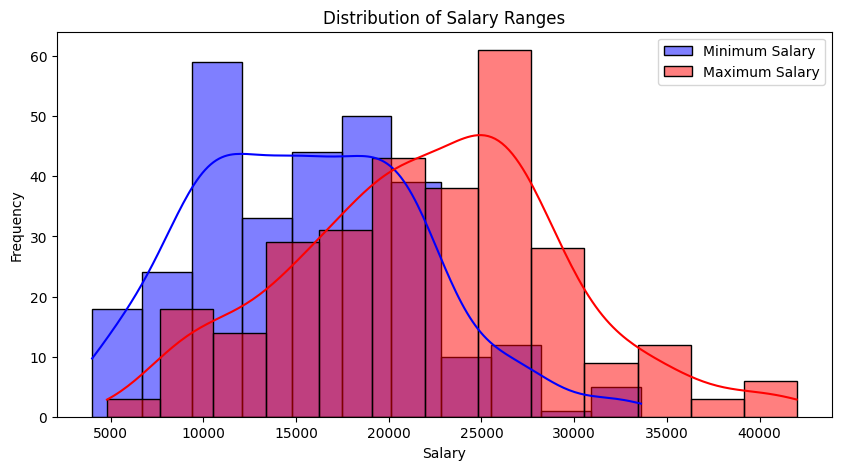

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(df['Salary_Min'], color='blue', label='Minimum Salary', kde=True)
sns.histplot(df['Salary_Max'], color='red', label='Maximum Salary', kde=True)
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Salary Ranges')
plt.legend()
plt.show()


5. Experience Level Distribution
This code will plot the distribution of job postings across different experience levels.

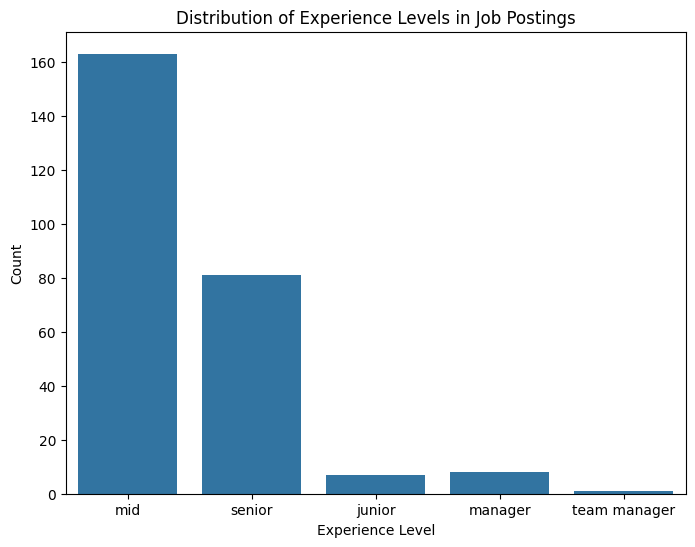

In [49]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Experience', data=df)
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('Distribution of Experience Levels in Job Postings')
plt.show()


6. Top Technologies Used
To understand the most common technologies listed in the job postings, this code block will parse and count the occurrences of each technology.

In [50]:
from collections import Counter
import ast

# Counting occurrences of each technology
tech_list = sum(df['Parsed Used Technologies'], [])
tech_counts = Counter(tech_list)

# Displaying the top 10 technologies
print(tech_counts.most_common(10))


[('Git', 48), ('Java', 47), ('SQL', 42), ('Docker', 38), ('Python', 35), ('AWS', 30), ('JavaScript', 28), ('TypeScript', 25), ('Kubernetes', 24), ('Linux', 22)]


8. Boxplot for Salary Distribution by Experience
This code will create boxplots to compare the distribution of salary ranges across different experience levels.

/Users/piotr/Documents/studia/mgr/SEM3/ZPDS/it-analysis/.venv/lib/python3.9/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/piotr/Documents/studia/mgr/SEM3/ZPDS/it-analysis/.venv/lib/python3.9/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


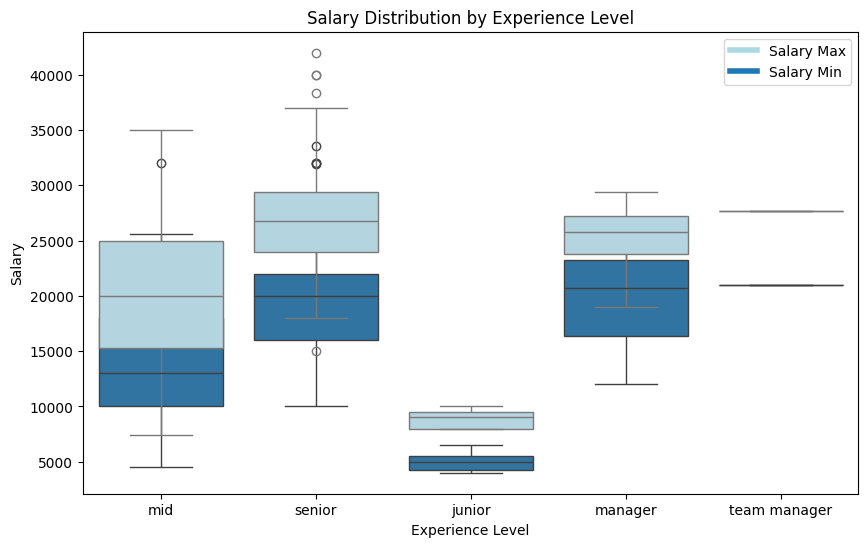

In [51]:
from matplotlib.lines import Line2D


plt.figure(figsize=(10, 6))
sns.boxplot(x='Experience', y='Salary_Min', data=df)
sns.boxplot(x='Experience', y='Salary_Max', data=df, color='lightblue')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.title('Salary Distribution by Experience Level')

legend_elements = [Line2D([0], [0], color='lightblue', lw=4, label='Salary Max'),
                   Line2D([0], [0], lw=4, label='Salary Min')]

plt.legend(handles=legend_elements)
plt.show()


9. Frequency of Companies Posting Jobs
This code block helps in understanding which companies are posting the most jobs.

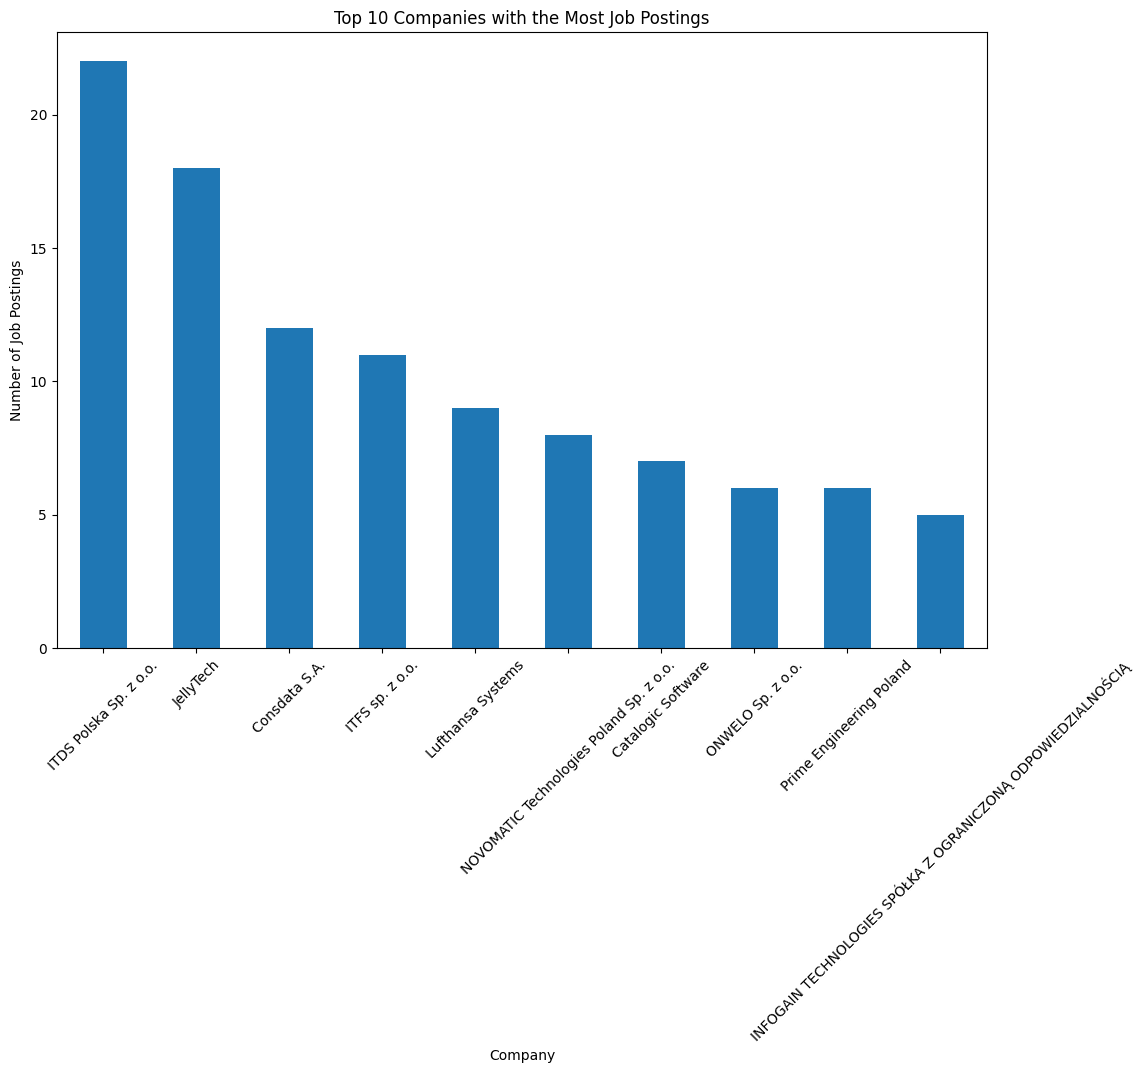

In [52]:
plt.figure(figsize=(12, 8))
df['Company'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Company')
plt.ylabel('Number of Job Postings')
plt.title('Top 10 Companies with the Most Job Postings')
plt.xticks(rotation=45)
plt.show()


10. Analysis of Optional Technologies
This code will analyze the occurrence of optional technologies mentioned in job postings.

In [53]:
optional_tech = df['Optional Technologies'].value_counts()
print(optional_tech.head(10))


Optional Technologies
-                                                                     44
Kafka, OpenShift                                                       8
PowerShell, Java, Jenkins, Kubernetes, Ansible                         3
ARM Cortex M3/M7, SPICE, CAN, EtherCAT, SPI, FPGA                      3
Azure DevOps                                                           3
UIKit, CoreData, XCTest, Xcode, Fastlane, Swift Package Manager        2
Jenkins, Terraform, Ansible, GitHub, Nexus                             2
Ansible, Terraform, Google Cloud Platform, AWS, Docker, Kubernetes     2
Terraform                                                              2
RabbitMQ                                                               2
Name: count, dtype: int64


11. Scatter Plot for Min and Max Salary
This code will create a scatter plot to visualize the relationship between minimum and maximum salary.

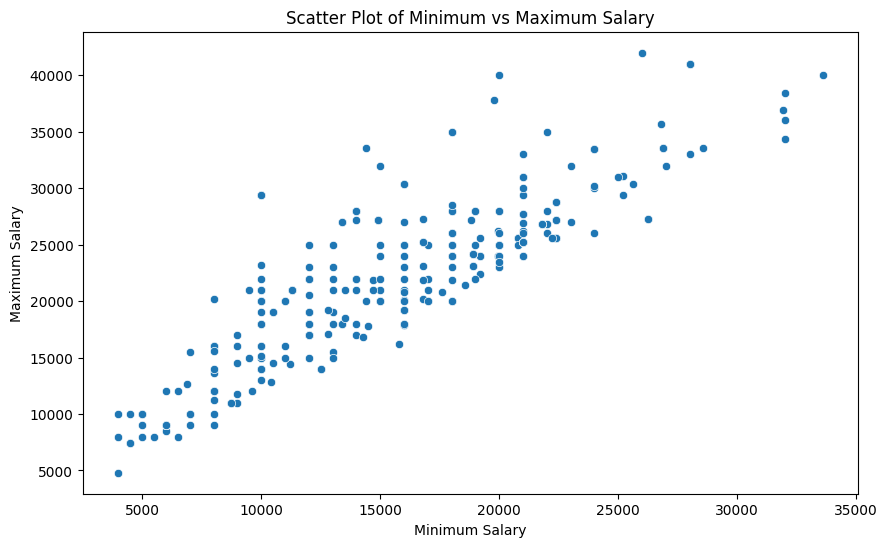

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Salary_Min', y='Salary_Max', data=df)
plt.xlabel('Minimum Salary')
plt.ylabel('Maximum Salary')
plt.title('Scatter Plot of Minimum vs Maximum Salary')
plt.show()


12. Word Cloud for Job Positions
To visualize the most common words in the job position titles, this code block will create a word cloud.

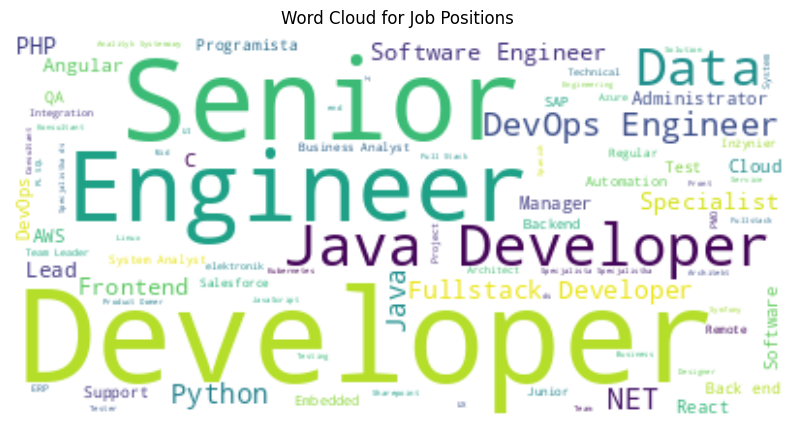

In [55]:
from wordcloud import WordCloud

text = ' '.join(df['Position'])
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Positions')
plt.show()


13. Count of Unique Values in Each Column
This code will help in understanding the diversity in each column by counting unique values.

In [56]:
df_modified = df.drop(columns=['Used Technologies', 'Parsed Used Technologies'])
unique_counts = df_modified.nunique()
print(unique_counts)


Position                 236
Company                  144
Experience                 5
Salary                   195
Optional Technologies     79
Salary_Min                67
Salary_Max                86
dtype: int64


14. Pair Plot for Numerical Columns
This code will create pair plots for all numerical columns to visualize relationships between them.

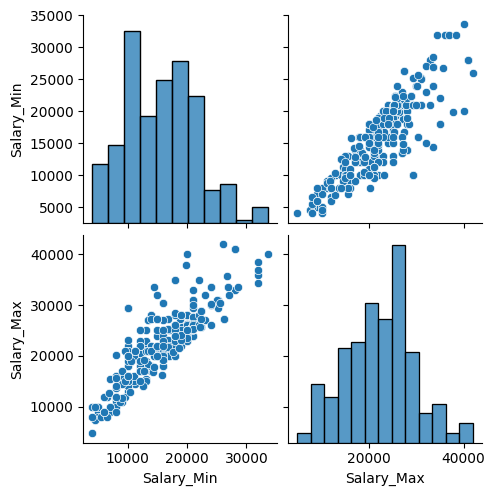

In [57]:
sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.show()
